Mu is -> 0.015218810784104789 Sigma is -> 1.2429050967829514 Kurtosis is -> 10.126500868169735 Skewness is -> -0.7774975256432138


,SX5E,simplereturn,logreturn
Date,,,
2012-11-05,2517.669922,NaN,NaN
2012-11-06,2535.939941,0.725672,0.723051
2012-11-07,2479.100098,-2.241372,-2.266872
2012-11-08,2479.129883,0.001201,0.001201
2012-11-09,2479.820068,0.027840,0.027836


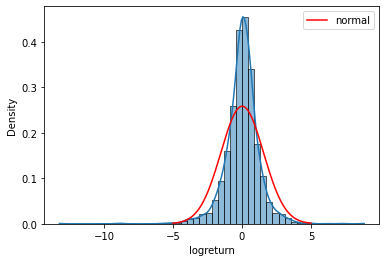

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm
SX5Edata = pd.read_csv(r'C:\Users\Alberto\Documents\0 UNIVERSIDAD\MSC Imperial\qrm\QRM-2022-cw1-data-a.csv',header=0, parse_dates=[0], index_col=0)
#SX5Edata.pop(SX5Edata.columns[0])
SX5Edata['simplereturn'] = SX5Edata['SX5E'].pct_change()
SX5Edata['logreturn'] = np.log(1 + SX5Edata['simplereturn'])
#aux1 = SX5Edata['SX5E']
#logreturns = np.log(aux1[1:] / aux1[:-1])
#SX5Edata['logreturnaux'] = logreturns

# Multiply the return values by 100 so they represent percentage values
SX5Edata['simplereturn']  = SX5Edata['simplereturn']  * 100
SX5Edata['logreturn'] = SX5Edata['logreturn'] * 100

#Calculation of parameters asked
mu = SX5Edata['logreturn'].mean()
sigma = SX5Edata['logreturn'].std()
skw = SX5Edata['logreturn'].skew()
kurt = SX5Edata['logreturn'].kurtosis()

x_values = np.linspace(-5,5,1000)

# Add the plot of N(\mu,\sigma) pdf on top of the seaborn histogram
sns_ax = sns.histplot(data=SX5Edata['logreturn'], bins=50, stat="density", kde=True)
sns_ax.plot(x_values,norm.pdf(x_values,mu ,sigma**2),label="normal", color = 'red')
plt.legend()
print('Mu is ->', mu, 'Sigma is ->', sigma, 'Kurtosis is ->', kurt, 'Skewness is ->', skw)
SX5Edata.head()

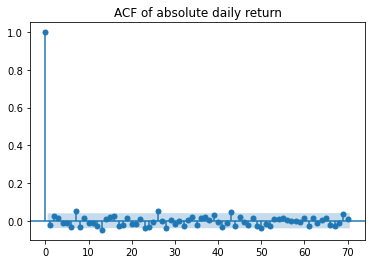

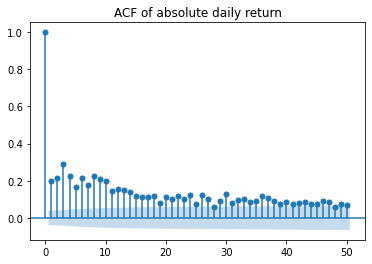

In [12]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(SX5Edata['logreturn'].dropna(), lags=70, title="ACF of absolute daily return")
plt.show()
sm.graphics.tsa.plot_acf(np.abs(SX5Edata['logreturn']).dropna(), lags=50, title="ACF of absolute daily return")
plt.show()

In [50]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


Iteration:      5,   Func. Count:     37,   Neg. LLF: 3866.417775610774
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3758.8529964211966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3758.8529956106386
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3758.85
Distribution:                  Normal   AIC:                           7525.71
Method:            Maximum Likelihood   BIC:                           7549.02
                                        No. Observations:                 2509
Date:                Thu, Nov 10 2022   Df Residuals:                     2508
Time:        

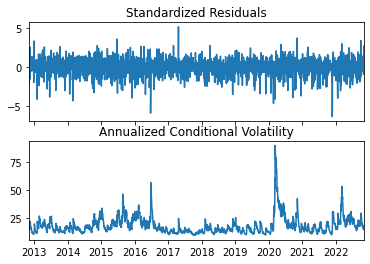

In [13]:
from arch.univariate import arch_model
garchmodel = arch_model(SX5Edata['logreturn'].dropna())
res = garchmodel.fit(update_freq=5)
print(res.summary())

<class 'arch.univariate.base.ARCHModelResult'>


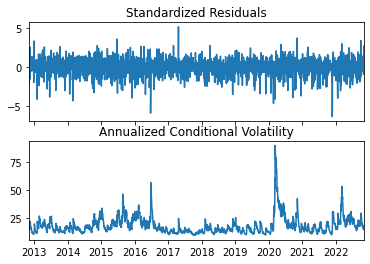

In [19]:
fig = res.plot(annualize="D")
print(type(res))